In [1]:
import ultraplot as uplt
import pandas as pd

In [2]:
slight_sentinel = pd.read_csv('./Data/ROC/slight_defol_sentinel.csv')
severe_sentinel = pd.read_csv('./Data/ROC/severe_defol_sentinel.csv')
slight_landsat = pd.read_csv('./Data/ROC/slight_defol_landsat.csv')
severe_landsat = pd.read_csv('./Data/ROC/severe_defol_landsat.csv')

In [4]:
slight_sentinel

doy  2021  2022  2023   2019   2020
0      1   NaN   NaN   NaN    NaN    NaN
1      2   NaN   NaN   NaN    NaN    NaN
2      6  0.27   NaN   NaN    NaN    NaN
3      7   NaN   NaN   NaN    NaN    NaN
4     11   NaN   NaN   NaN    NaN    NaN
..   ...   ...   ...   ...    ...    ...
141  352   NaN   NaN   NaN  0.181    NaN
142  356   NaN   NaN   NaN    NaN    NaN
143  357   NaN   NaN   NaN  0.338    NaN
144  361   NaN   NaN   NaN    NaN    NaN
145  362   NaN   NaN   NaN    NaN  0.342

[146 rows x 6 columns]

In [12]:
def add_years(ax, df, years, colors, zorders):
    for i in range(len(year)):
        data = df[['doy', years[i]]].dropna()
        ax.plot('doy', years[i], data=data, color=colors[i], zorder=zorders[i])
    ax.format(ylabel='EVI', xlabel='Day Of Year')

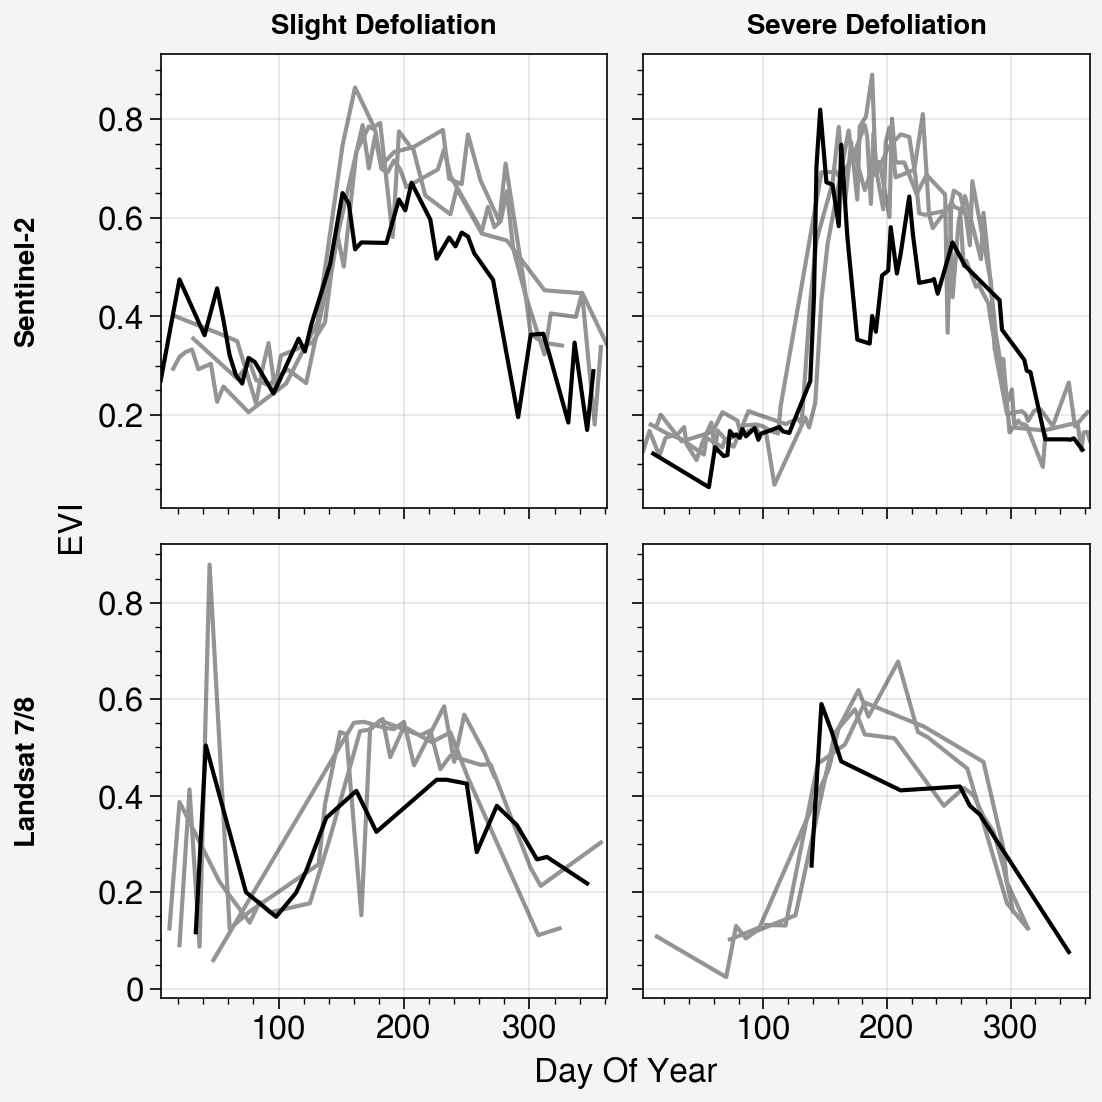

In [19]:
fig, axes = uplt.subplots(nrows=2, ncols=2, figsize=('140mm', '140mm'), fontsize=12)

years = ['2019', '2020', '2021', '2022', '2023']
colors = ['gray', 'gray', 'black', 'gray', 'gray']
zorders = [0, 0, 1, 0, 0]

add_years(axes[0], slight_sentinel, years, colors, zorders)
add_years(axes[1], severe_sentinel, years, colors, zorders)
add_years(axes[2], slight_landsat, years, colors, zorders)
add_years(axes[3], severe_landsat, years, colors, zorders)

axes.format(leftlabels=('Sentinel-2', 'Landsat 7/8'), toplabels=('Slight Defoliation', 'Severe Defoliation'))
fig.savefig('./Figures/ROC/classification_example.svg')